In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
yield_data = pd.read_csv(r'/home/tipatle/Project/Crop Yield Prediction/Data/yield.csv')
temp_data = pd.read_csv(r'/home/tipatle/Project/Crop Yield Prediction/Data/temp.csv')
rainfall_data = pd.read_csv(r'/home/tipatle/Project/Crop Yield Prediction/Data/rainfall.csv')
pesticides_data = pd.read_csv(r'/home/tipatle/Project/Crop Yield Prediction/Data/pesticides.csv')

In [3]:
yield_data.sample(5)

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
32567,QC,Crops,137,Mauritius,5419,Yield,125,Cassava,2004,2004,hg/ha,187500
22693,QC,Crops,175,Guinea-Bissau,5419,Yield,125,Cassava,1998,1998,hg/ha,152381
2041,QC,Crops,10,Australia,5419,Yield,56,Maize,2005,2005,hg/ha,57983
22447,QC,Crops,90,Guinea,5419,Yield,116,Potatoes,2009,2009,hg/ha,89880
16337,QC,Crops,56,Dominican Republic,5419,Yield,137,Yams,1983,1983,hg/ha,56244


In [4]:
temp_data.sample(5)

,year,country,avg_temp
27108,1893,India,23.65
48565,1867,Burkina Faso,NaN
1628,1957,United States,11.44
60159,1933,Singapore,26.37
13355,1851,Venezuela,24.54


In [5]:
rainfall_data.sample(5)

,Area,Year,average_rain_fall_mm_per_year
3506,Libya,1989,56
4860,Poland,2011,600
1314,Colombia,1998,3240
5555,Spain,1992,636
3336,Kyrgyz Republic,2006,533


In [6]:
pesticides_data.sample(5)

,Domain,Area,Element,Item,Year,Unit,Value
3914,Pesticides Use,Tonga,Use,Pesticides (total),2014,tonnes of active ingredients,15.09
2724,Pesticides Use,Namibia,Use,Pesticides (total),2013,tonnes of active ingredients,56.00
1957,Pesticides Use,Israel,Use,Pesticides (total),1995,tonnes of active ingredients,2491.00
1044,Pesticides Use,Cook Islands,Use,Pesticides (total),2014,tonnes of active ingredients,3.33
2210,Pesticides Use,Lao People's Democratic Republic,Use,Pesticides (total),2009,tonnes of active ingredients,25.67


In [7]:
yield_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56717 entries, 0 to 56716
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Domain Code   56717 non-null  object
 1   Domain        56717 non-null  object
 2   Area Code     56717 non-null  int64 
 3   Area          56717 non-null  object
 4   Element Code  56717 non-null  int64 
 5   Element       56717 non-null  object
 6   Item Code     56717 non-null  int64 
 7   Item          56717 non-null  object
 8   Year Code     56717 non-null  int64 
 9   Year          56717 non-null  int64 
 10  Unit          56717 non-null  object
 11  Value         56717 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 5.2+ MB


In [8]:
yield_data.isnull().sum()

Domain Code     0
Domain          0
Area Code       0
Area            0
Element Code    0
Element         0
Item Code       0
Item            0
Year Code       0
Year            0
Unit            0
Value           0
dtype: int64

In [9]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71311 entries, 0 to 71310
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      71311 non-null  int64  
 1   country   71311 non-null  object 
 2   avg_temp  68764 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


In [10]:
temp_data.isnull().sum()

year           0
country        0
avg_temp    2547
dtype: int64

In [11]:
rainfall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0    Area                          6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 157.8+ KB


In [12]:
rainfall_data.isnull().sum()

 Area                              0
Year                               0
average_rain_fall_mm_per_year    774
dtype: int64

In [13]:
pesticides_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349 entries, 0 to 4348
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Domain   4349 non-null   object 
 1   Area     4349 non-null   object 
 2   Element  4349 non-null   object 
 3   Item     4349 non-null   object 
 4   Year     4349 non-null   int64  
 5   Unit     4349 non-null   object 
 6   Value    4349 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 238.0+ KB


In [14]:
pesticides_data.isnull().sum()

Domain     0
Area       0
Element    0
Item       0
Year       0
Unit       0
Value      0
dtype: int64

Observation: 
1. pesticides data does not contain any null values.
2. temp data contain null values at avg temp column.
3. rainfall data contain null values at average rainfall mm per year column.
4. yield data does not contain any null values.

Conclusion:- 
1. We need to fill the values in rainfall data but it depends because we need more information about that.
2. We need to fill the values in temp data but if depends because we need more information about that.
3. There are two columns i.e Area and Year which is common in all of them this is primary key to merge all of the data which is present between them.

### Year Column Analysis

In [15]:
yield_year = yield_data['Year'].unique()
yield_year.sort()
yield_year

array([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016])

In [16]:
temp_year = temp_data['year'].unique()
temp_year.sort()
temp_year

array([1743, 1744, 1745, 1746, 1747, 1748, 1749, 1750, 1751, 1752, 1753,
       1754, 1755, 1756, 1757, 1758, 1759, 1760, 1761, 1762, 1763, 1764,
       1765, 1766, 1767, 1768, 1769, 1770, 1771, 1772, 1773, 1774, 1775,
       1776, 1777, 1778, 1779, 1780, 1781, 1782, 1783, 1784, 1785, 1786,
       1787, 1788, 1789, 1790, 1791, 1792, 1793, 1794, 1795, 1796, 1797,
       1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808,
       1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819,
       1820, 1821, 1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829, 1830,
       1831, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841,
       1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852,
       1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863,
       1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874,
       1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885,
       1886, 1887, 1888, 1889, 1890, 1891, 1892, 18

In [17]:
rainfall_year = rainfall_data['Year'].unique()
rainfall_year.sort()
rainfall_year

array([1985, 1986, 1987, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

In [18]:
pesticides_year = pesticides_data['Year'].unique()
pesticides_year.sort()
pesticides_year

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016])

In [19]:
min_year = max(max(min(pesticides_year), min(yield_year)), max(min(rainfall_year), min(temp_year)))
max_year = min(min(max(pesticides_year), max(yield_year)), min(max(rainfall_year), max(temp_year)))
min_year, max_year

(1990, 2013)

Observation:
1. yield data have been collected from 1961 to 2016.
2. pesticides data have been collected from 1990 to 2016.
3. rainfall data have been collected from 1985 to 2017
4. temp data have been collected from 1743 to 2013

Conclusion:
We have 24 years of data, ranging from 1990 to 2013, which is present/common in all of them.

### Area Column Analysis

In [20]:
yield_area = yield_data['Area'].unique()
yield_area.sort()
yield_area

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belgium-Luxembourg', 'Belize',
       'Benin', 'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Taiwan Province of',
       'China, mainland', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Czechoslovakia', "Côte d'Ivoire",
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic',

In [21]:
temp_area = temp_data['country'].unique()
temp_area.sort()
temp_area

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Bolivia',
       'Bosnia And Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cameroon', 'Canada',
       'Central African Republic', 'Chile', 'China', 'Colombia', 'Congo',
       'Congo (Democratic Republic Of The)', 'Croatia', 'Czech Republic',
       "Côte D'Ivoire", 'Denmark', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Finland', 'France', 'Gabon', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea Bissau', 'Guyana',
       'Haiti', 'Honduras', 'Hong Kong', 'Hungary', 'India', 'Indonesia',
       'Iran', 'Iraq', 'Ireland', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kenya', 'Laos', 'Latvia', 'Lebanon', 'Lesotho',
       'Liberia', 'Libya', 'Lithuania', 'Maced

In [22]:
rainfall_area = rainfall_data[' Area'].unique()
rainfall_area.sort()
rainfall_area

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Faroe Islands', 'Fiji', 

In [23]:
pesticides_area = pesticides_data['Area'].unique()
pesticides_area.sort()
pesticides_area

array(['Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belgium-Luxembourg', 'Belize', 'Bermuda', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China, Hong Kong SAR', 'China, Macao SAR',
       'China, Taiwan Province of', 'China, mainland', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Croatia',
       'Cyprus', 'Czechia', "Côte d'Ivoire", 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea',
       'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'French Polynesia', 'Gambia', 'Germany', 'Ghana', 'Greece',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
   

In [24]:
common_area = []
uncommon_area = []
for i in yield_area:
    if(i in rainfall_area and i in temp_area and i in pesticides_area):
        common_area.append(i)
    else:
        uncommon_area.append(i)

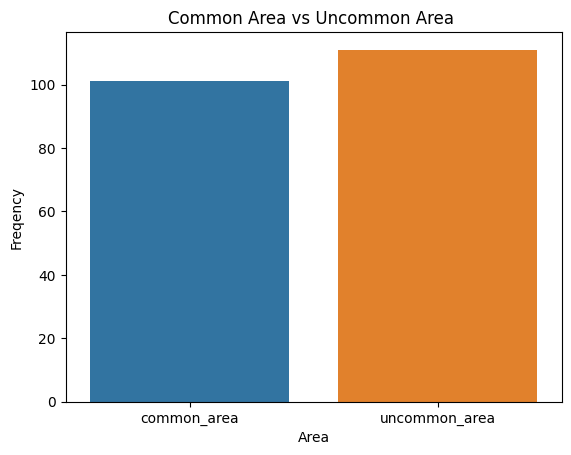

In [25]:
sns.barplot(x=['common_area', 'uncommon_area'], y=[len(common_area), len(uncommon_area)])
plt.title('Common Area vs Uncommon Area ')
plt.xlabel('Area')
plt.ylabel('Freqency')
plt.show()

In [26]:
yield_data[yield_data['Area'].apply(lambda x: True if x in common_area else False )].shape

(29965, 12)

Observation: 
1. About 50% of yield_data belong to common_area category.
2. Upon carefully observing I found out that yield_area contain country names which isn't used today so we need to carefully find our each uncommon area other names and rename all the areas to new area in order to merge our data.
3. There may be some missing area which is unaccounted in any one of the following data we will just ignore that area.

Let's work on only those 50% of Dataset and Proceed with further as finding various names of the country and manually replacing every country name is hastle. So I'm skipping it.

### Analysis of Yield Dataset

#### Analysing Domain Code and Domain 

In [27]:
yield_data['Domain'].unique()

array(['Crops'], dtype=object)

In [28]:
yield_data['Domain Code'].unique()

array(['QC'], dtype=object)

Observation: 
1. Domain and Domain Code represent the same thing but Domain Code is the short abservation of Domain.
2. Both Domain and Domain Code contains only single unique values only.
3. As Both Domain and Domain does not provide any valuable information which can help the model. Even if we include those column in our data they will best act as bias(model eqn) in some of the model such as linear regression and losgistic Regression.

Conclusion: We can leave the column as it is or remove it. I choose to remove those columns.

In [29]:
yield_data = yield_data.drop(columns=['Domain', 'Domain Code'])

#### Analysing Area and Area Code columns

As It is given that Area Code and Area represent the same thing so we would keep one of the two. If we don't remove, It will create a bias problem.

In [30]:
yield_data = yield_data.drop(columns=['Area Code'])

#### Analysing Element Code and Element Columns

In [31]:
yield_data['Element Code'].unique()

array([5419])

In [32]:
yield_data['Element'].unique()

array(['Yield'], dtype=object)

Observation: 
1. Element and Element Code represent the same thing but Element Code is the short abservation of Element.
2. Both Element and Elment Code contains only single unique values only.
3. As Both Element Code and Element does not provide any valuable information which can help the model. Even if we include those column in our data they will best act as bias(model eqn) in some of the model such as linear regression and losgistic Regression.

Conclusion: We can leave the column as it is or remove it. I choose to remove those columns.

In [33]:
yield_data = yield_data.drop(columns=['Element', 'Element Code'])

Analysing Item Code and Item Columns

In [34]:
yield_data['Item Code'].unique()

array([ 56, 116,  27,  15,  83, 236, 125, 137, 122, 489])

In [35]:
yield_data['Item'].unique()

array(['Maize', 'Potatoes', 'Rice, paddy', 'Wheat', 'Sorghum', 'Soybeans',
       'Cassava', 'Yams', 'Sweet potatoes', 'Plantains and others'],
      dtype=object)

As It is given that Item Code and Item represent the same thing so we would keep Item and remove Item Code

In [36]:
yield_data = yield_data.drop(columns=['Item Code'])

#### Analysing Year Code and Year Columns

In [37]:
def isSame(a, b):
    if(a.shape!=b.shape):
        return False
    return (np.sum((a!=b)) == 0)

In [38]:
isSame(yield_data['Year'], yield_data['Year Code'])

True

Observation: From above we can observe that Year and Year Code column is same just column name is different. 

Conclusion: Remove either Year or Year Code. If not removed it will create a bias. Which is huge problem. 

In [39]:
yield_data = yield_data.drop(['Year Code'], axis=1)

### Analysis of Unit Columns

In [40]:
yield_data['Unit'].unique()

array(['hg/ha'], dtype=object)

Observation: It is a columns which defines yield unit's. Here all the row have same 

Conclusion:  So we would drop this columns also as it doesn't provide any type of added knowledge to a model.

In [41]:
yield_data = yield_data.drop(['Unit'], axis=1)

### Pesticides Dataset Analysis

### Domain Column Analysis

In [42]:
pesticides_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349 entries, 0 to 4348
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Domain   4349 non-null   object 
 1   Area     4349 non-null   object 
 2   Element  4349 non-null   object 
 3   Item     4349 non-null   object 
 4   Year     4349 non-null   int64  
 5   Unit     4349 non-null   object 
 6   Value    4349 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 238.0+ KB


In [43]:
pesticides_data['Domain'].unique()

array(['Pesticides Use'], dtype=object)

Observation: Pesticides datasets contains the data of how much pesticides is used, where it is used, in how much quatity etc. In our dataset the domain value is only 'Pesticides Use' as it obvious now a day's farmer's uses pesticides to gain more production out of the plant and to protect them from pest. 

Conclusion: So we would drop this columns also as it doesn't provide any type of added knowledge to a model.

In [44]:
pesticides_data = pesticides_data.drop(['Domain'], axis=1)

### Element Column Analysis

In [45]:
pesticides_data['Element'].unique()

array(['Use'], dtype=object)

Observation: In our dataset the Element value is only 'Use' as it obvious now a day's farmer's uses pesticides to gain more production out of the plant and to protect them from pest. 

Conclusion: So we would drop this columns also as it doesn;t provide any type of added knowledge to a model.

In [46]:
pesticides_data = pesticides_data.drop(['Element'], axis=1)

### Item Columns Analysis

In [47]:
pesticides_data['Item'].unique()

array(['Pesticides (total)'], dtype=object)

Observation: In our dataset there is only Item.

Conclusion: So we would drop this columns also as it doesn;t provide any type of added knowledge to a model.

In [48]:
pesticides_data = pesticides_data.drop(['Item'], axis=1)

### Unit Columns Analysis

In [49]:
pesticides_data['Unit'].unique()

array(['tonnes of active ingredients'], dtype=object)

 Observation: It is a columns which defines yield unit's. Here all the row have same 
 
 Conclusion: So we would drop this columns also as it doesn;t provide any type of added knowledge to a model.

In [50]:
pesticides_data = pesticides_data.drop(['Unit'], axis=1)

### Merging All The Dataset

In [51]:
yield_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56717 entries, 0 to 56716
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Area    56717 non-null  object
 1   Item    56717 non-null  object
 2   Year    56717 non-null  int64 
 3   Value   56717 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.7+ MB


In [52]:
rainfall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0    Area                          6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 157.8+ KB


In [53]:
rainfall_data.columns = ['Area', 'Year', 'average_rain_fall_mm_per_year']

In [54]:
merged_data = pd.merge(yield_data, rainfall_data, how = 'inner', on=['Area', 'Year'])

In [55]:
merged_data

,Area,Item,Year,Value,average_rain_fall_mm_per_year
0,Afghanistan,Maize,1985,16652,327
1,Afghanistan,Potatoes,1985,140909,327
2,Afghanistan,"Rice, paddy",1985,22482,327
3,Afghanistan,Wheat,1985,12277,327
4,Afghanistan,Maize,1986,16875,327
...,...,...,...,...,...
26100,Zimbabwe,"Rice, paddy",2016,22828,657
26101,Zimbabwe,Sorghum,2016,2688,657
26102,Zimbabwe,Soybeans,2016,12727,657
26103,Zimbabwe,Sweet potatoes,2016,22212,657


In [56]:
merged_data.columns = ['Area', 'Item', 'Year', 'Yield Value', 'average_rain_fall_mm_per_year']

In [57]:
pesticides_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349 entries, 0 to 4348
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Area    4349 non-null   object 
 1   Year    4349 non-null   int64  
 2   Value   4349 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 102.1+ KB


In [58]:
pesticides_data.columns = ['Area', 'Year', 'Pesticies Value']

In [59]:
merged_data = pd.merge(merged_data, pesticides_data, how = 'inner', on=['Area', 'Year'])

In [60]:
merged_data

,Area,Item,Year,Yield Value,average_rain_fall_mm_per_year,Pesticies Value
0,Albania,Maize,1990,36613,1485,121.00
1,Albania,Potatoes,1990,66667,1485,121.00
2,Albania,"Rice, paddy",1990,23333,1485,121.00
3,Albania,Sorghum,1990,12500,1485,121.00
4,Albania,Soybeans,1990,7000,1485,121.00
...,...,...,...,...,...,...
19351,Zimbabwe,"Rice, paddy",2016,22828,657,2185.07
19352,Zimbabwe,Sorghum,2016,2688,657,2185.07
19353,Zimbabwe,Soybeans,2016,12727,657,2185.07
19354,Zimbabwe,Sweet potatoes,2016,22212,657,2185.07


In [61]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71311 entries, 0 to 71310
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      71311 non-null  int64  
 1   country   71311 non-null  object 
 2   avg_temp  68764 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


In [62]:
temp_data.columns = ['Year', 'Area', 'Avg_Temp']

In [63]:
merged_data = pd.merge(merged_data, temp_data, how = 'inner', on=['Area', 'Year'])

In [64]:
merged_data.sample(15)

,Area,Item,Year,Yield Value,average_rain_fall_mm_per_year,Pesticies Value,Avg_Temp
24436,Senegal,Maize,2007,11008,686,557.92,25.34
4544,Brazil,Maize,2011,42107,1761,345026.00,20.33
11078,India,Maize,1993,16015,1083,66388.00,27.04
15768,Italy,Sorghum,1994,59924,832,81217.60,8.39
25759,Sri Lanka,Sweet potatoes,1998,60640,1712,1532.41,27.13
16424,Japan,Sweet potatoes,1995,241020,1668,79821.18,12.98
25730,Sri Lanka,Plantains and others,1995,131818,1712,1735.50,26.59
14745,Indonesia,Maize,1995,22580,2702,1597.00,27.28
19479,Mexico,Sweet potatoes,1997,209597,758,34468.93,25.21
2009,Bahamas,Sweet potatoes,1997,30800,1292,484.59,25.81


In [65]:
FinalData = merged_data

In [66]:
FinalData.to_csv('/home/tipatle/Project/Crop Yield Prediction/Data/FinalCropYieldData.csv')